# ÎÇòÎßåÏùò ÌöåÍ∑Ä Î™®Îç∏(Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏) ÎßåÎì§Í∏∞

In [1]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìå®ÌÇ§ÏßÄ
import numpy as np
import pandas as pd

# Í∏∞Í≥ÑÌïôÏäµ Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌèâÍ∞Ä Ìå®ÌÇ§ÏßÄ
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv("house_price.csv") #Î≥¥Ïä§ÌÑ¥ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

# Data Description
* ÌôúÏö© Îç∞Ïù¥ÌÑ∞: 1978ÎÖÑ Boston ÏßÄÏó≠Ïùò Ï£ºÌÉù Í∞ÄÍ≤©Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞
* Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞: [506 x 14]
    * Îç∞Ïù¥ÌÑ∞: 1978ÎÖÑ Î≥¥Ïä§ÌÑ¥ Ï£ºÌÉù Í∞ÄÍ≤©
    * Í¥ÄÏ∏°Ïπò Í∞úÏàò(Ìñâ): 506Í∞ú
    * Î≥ÄÏàò Í∞úÏàò: ÏÑ§Î™ÖÎ≥ÄÏàò 13Í∞ú / Î∞òÏùëÎ≥ÄÏàò 1Í∞ú
        * **ÎèÖÎ¶Ω Î≥ÄÏàò** (ÏõêÏù∏: ÏòàÏ∏°Í∞íÏùÑ ÏÑ§Î™ÖÌï† Ïàò ÏûàÎäî Î≥ÄÏàò)
            * CRIM: Î≤îÏ£ÑÏú®
            * INDUS: ÎπÑÏÜåÎß§ÏÉÅÏóÖÏßÄÏó≠ Î©¥Ï†Å ÎπÑÏú®
            * NOX: ÏùºÏÇ∞ÌôîÏßàÏÜå ÎÜçÎèÑ
            * RM: Ï£ºÌÉùÎãπ Î∞© Ïàò
            * LSTAT: Ïù∏Íµ¨ Ï§ë ÌïòÏúÑ Í≥ÑÏ∏µ ÎπÑÏú®
            * B: Ïù∏Íµ¨ Ï§ë ÌùëÏù∏ ÎπÑÏú®
            * PTRATIO: ÌïôÏÉù/ÍµêÏÇ¨ ÎπÑÏú®
            * ZN: 25,000 ÌèâÎ∞©ÌîºÌä∏ Ï¥àÍ≥º Í±∞Ï£ºÏßÄÏó≠ ÎπÑÏú®
            * CHAS: Ï∞∞Ïä§Í∞ïÏùò Í≤ΩÍ≥ÑÏóê ÏúÑÏπòÌïú Í≤ΩÏö∞Îäî 1, ÏïÑÎãàÎ©¥ 0
            * AGE: 1940ÎÖÑ Ïù¥Ï†ÑÏóê Í±¥Ï∂ïÎêú Ï£ºÌÉùÏùò ÎπÑÏú®
            * RAD: Î∞©ÏÇ¨Ìòï Í≥†ÏÜçÎèÑÎ°úÍπåÏßÄÏùò Í±∞Î¶¨
            * DIS: ÏßÅÏóÖÏÑºÌÑ∞Ïùò Í±∞Î¶¨
            * TAX: Ïû¨ÏÇ∞ÏÑ∏Ïú®
        * **Ï¢ÖÏÜç Î≥ÄÏàò** (Í≤∞Í≥º: ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî Í∞í)
            * MEDV: Ï£ºÌÉùÍ∞ÄÍ≤©

# EDA

In [2]:
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT.MEDV  
0       15.3  396.90   4.98  24.0         0  
1       17.8  396.90   9.14  21.6         0  
2       17.8  392.83   4.03  34.7         1  
3       18.7  394.63   2.94  33.4         1  
4       18.7  396.90   5.33  36.2         1  
..       ...     ...    ...   ...       ...  
501     21.0  391.99   9.67  22.4         0  
502     21.0  396.90   9.08  20.6         0  
503     21.0  396.90   5.64  23.9         0  
504     21.0  393.45   6.48  22.0         0  
505     21.0  396.90   7.88  11.9         0  

[506 rows x 15 columns]

* CAT.MEDVÎäî MEDVÏôÄ ÏÑúÎ°ú ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ Ìé∏ÏûÑ.
* Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÌÅ¨Î©¥ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú Î∞úÏÉù Í∞ÄÎä• => CAT.MEDVÎ•º drop ÌïòÍ∏∞

In [3]:
# CAT.MEDVÎ•º dropÌïòÍ∏∞
boston.drop(labels='CAT.MEDV', axis=1, inplace=True)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
boston.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏

Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏ - heatmap Ïù¥Ïö©

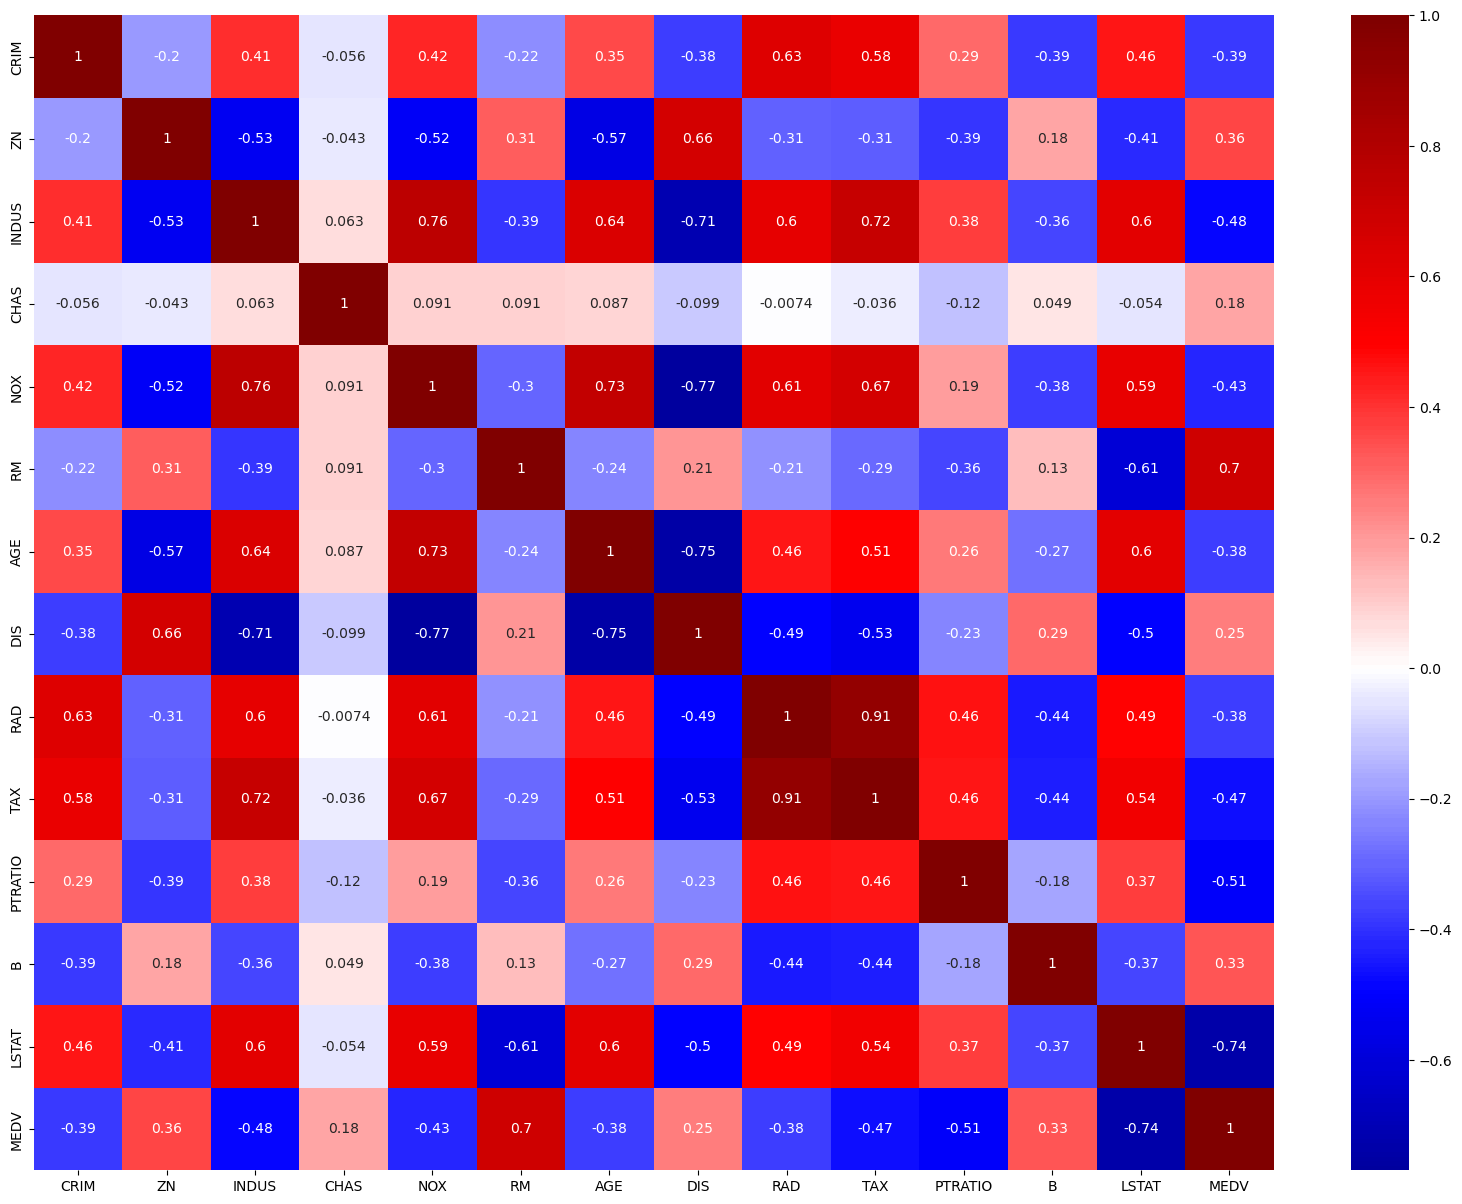

In [11]:
plt.figure(figsize=(20,15))

# center=0ÏúºÎ°ú ÏÑ§Ï†ïÌï¥Ï§å
sns.heatmap(boston.corr(), annot=True, cmap='seismic', center=0)
plt.show()

* CHASÎäî Îã§Î•∏ Î≥ÄÏàòÎì§Í≥º ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÇÆÎã§. <br> <br>
* MEDVÍ≥º ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎäî?
    * LSTAT (-0.74, ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * RM (0.7, ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)  <br> <br>
* ÌäπÌûà ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎì§Ïùò Ï°∞Ìï©ÏùÄ?
    * RADÏôÄ TAX (0.91, ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * NOXÏôÄ DIS (-0.77, ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * NOXÏôÄ INDUS (0.76, ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * AGEÏôÄ DIS (-0.75, ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)  <br> <br>
* LSTATÏôÄ ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎäî?(MEDV Ï†úÏô∏)
    * RM (-0.61, ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * INDUS (0.6, ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * AGE (0.6, ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)
    * NOX (0.59, ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)  <br> <br>
* RMÏôÄ ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎäî?(MEDV Ï†úÏô∏)
    * LSTAT (0.74, ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)

### ‚û°Ô∏è (1) CHAS Î≥ÄÏàò (Ï∞∞Ïä§Í∞ïÏùò Í≤ΩÍ≥ÑÏóê ÏúÑÏπòÌïú Í≤ΩÏö∞Îäî 1, ÏïÑÎãàÎ©¥ 0) Ï†úÍ±∞ÌïòÍ∏∞

In [12]:
# CHASÎ•º dropÌïòÍ∏∞
boston.drop(labels='CHAS', axis=1, inplace=True)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
boston.head(3)

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

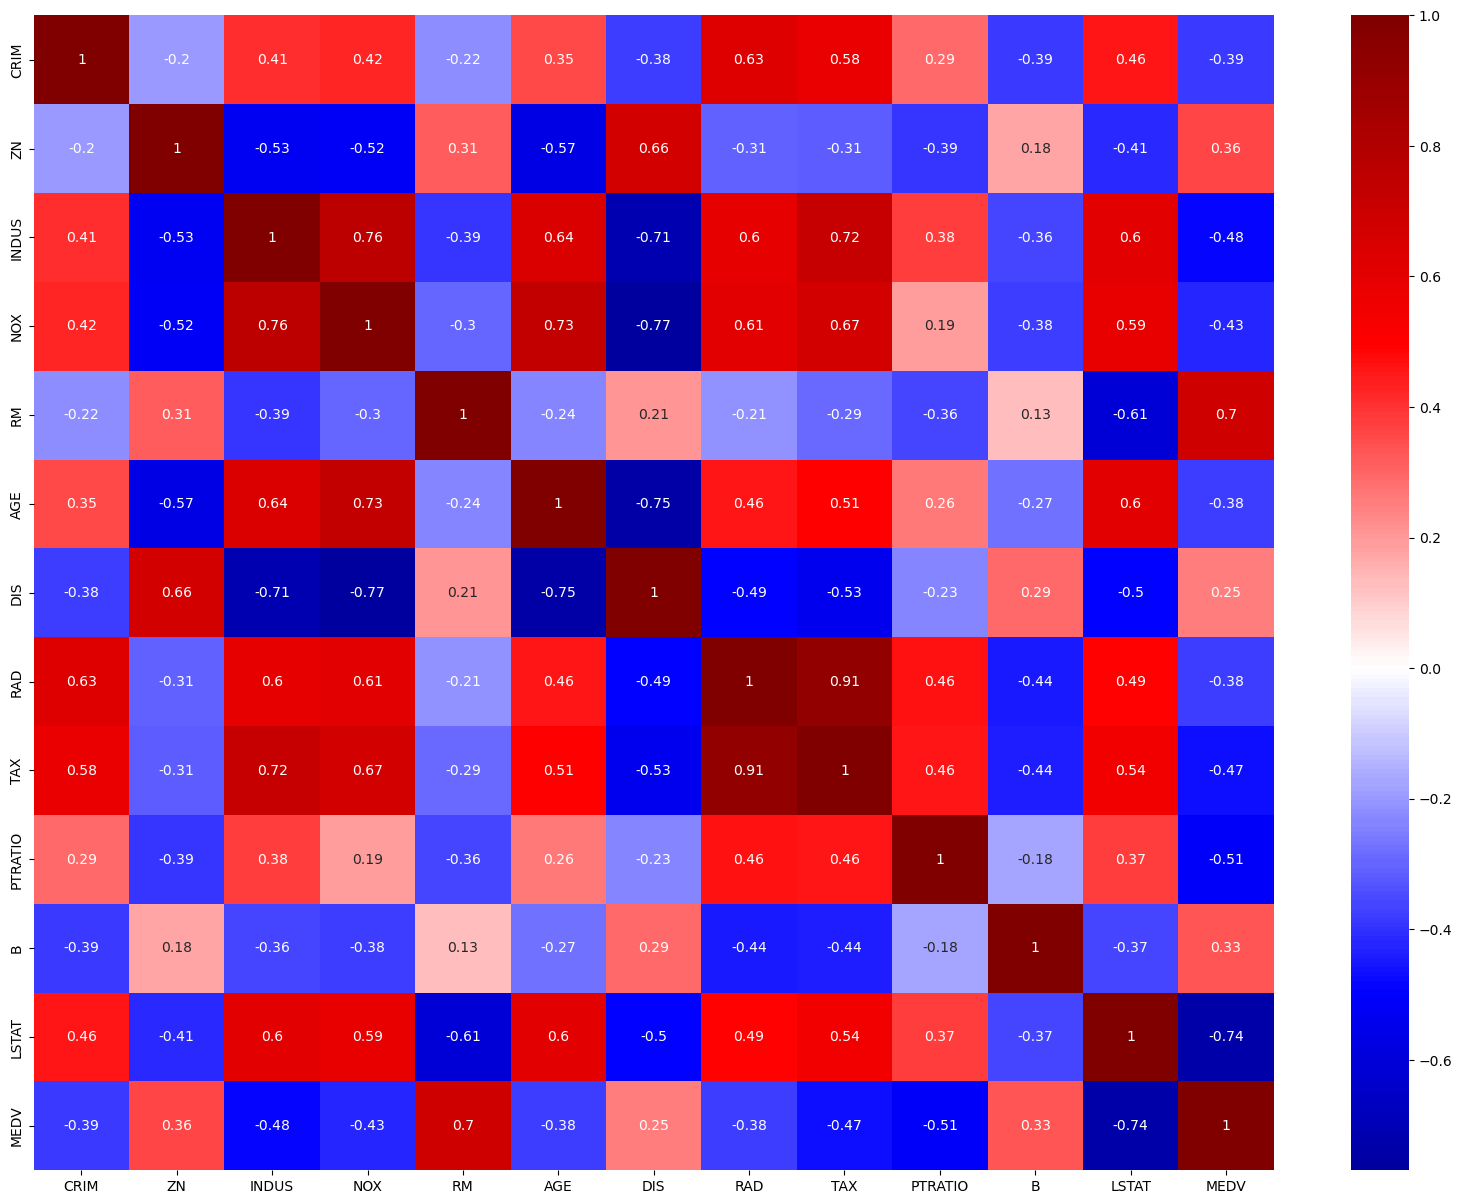

In [13]:
plt.figure(figsize=(20,15))

# center=0ÏúºÎ°ú ÏÑ§Ï†ïÌï¥Ï§å
sns.heatmap(boston.corr(), annot=True, cmap='seismic', center=0)
plt.show()

### ‚û°Ô∏è (2) RADÏôÄ TAXÎ•º Î¨∂ÏùÑ Ïàò ÏûàÏùÑÍπå? (PCA)
* RAD: Î∞©ÏÇ¨Ìòï Í≥†ÏÜçÎèÑÎ°úÍπåÏßÄÏùò Í±∞Î¶¨
* TAX: Ïû¨ÏÇ∞ÏÑ∏Ïú®

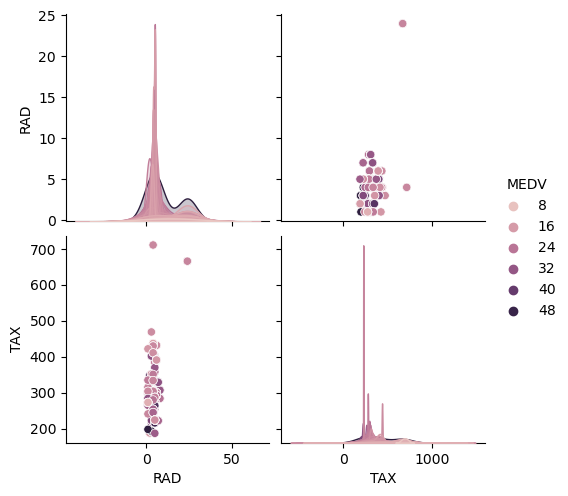

In [18]:
fig = sns.pairplot(boston,hue='MEDV', vars=['RAD', 'TAX'])

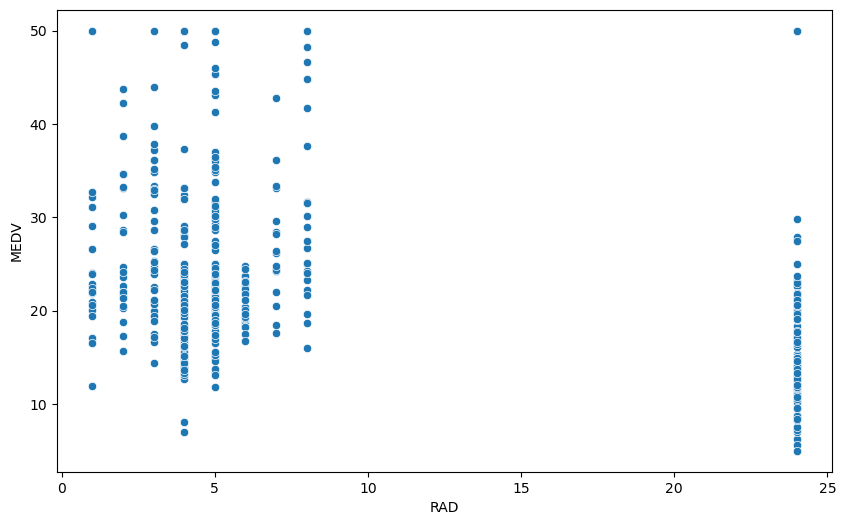

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=boston['RAD'], y=boston['MEDV'])
plt.show()

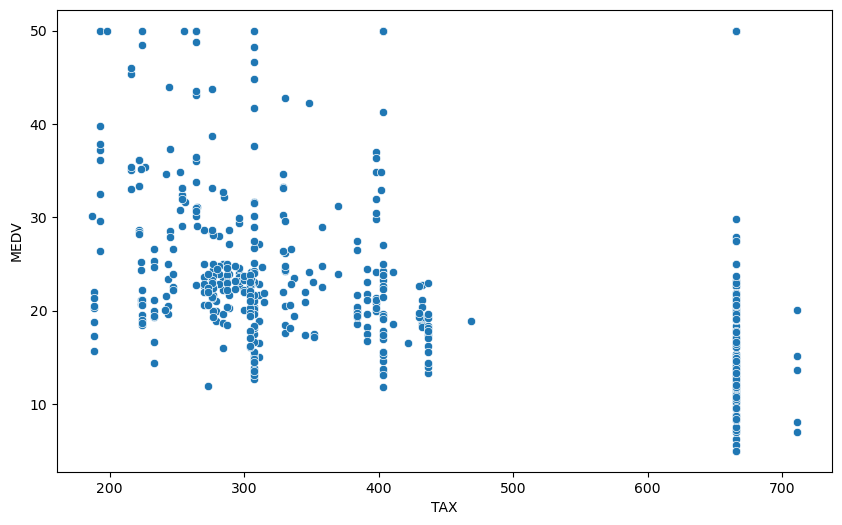

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=boston['TAX'], y=boston['MEDV'])
plt.show()

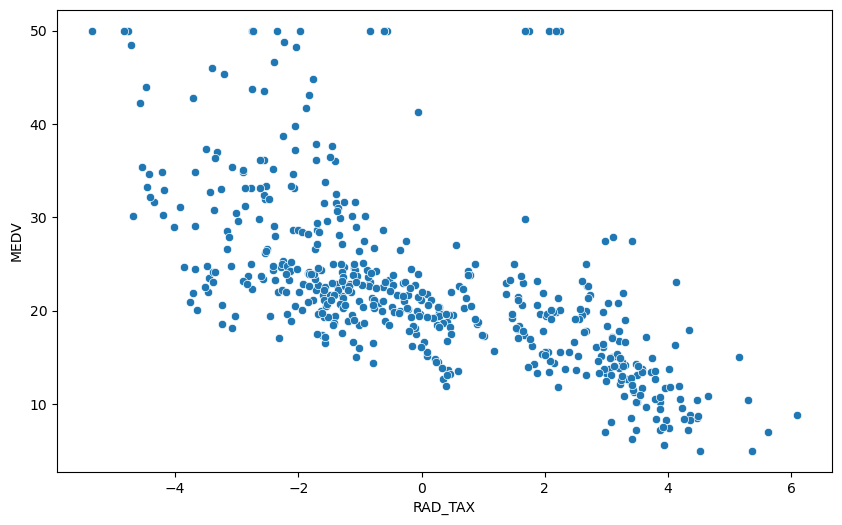

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

boston['RAD_TAX'] = X_pca

plt.figure(figsize=(10,6))
sns.scatterplot(x=boston['RAD_TAX'], y=boston['MEDV'])
plt.show()

In [30]:
boston.head(3)

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV   RAD_TAX  
0  396.90   4.98  24.0 -1.850648  
1  396.90   9.14  21.6 -1.299083  
2  392.83   4.03  34.7 -2.079077

In [31]:
# RAD_TAXÎßå ÎÇ®Í∏∞Í≥†, RADÏôÄ TAXÎäî ÏÇ≠Ï†úÌïòÍ∏∞
boston.drop(['RAD', 'TAX'], axis=1, inplace=True)

In [32]:
boston.head(3)

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  PTRATIO       B  LSTAT  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900     15.3  396.90   4.98   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671     17.8  396.90   9.14   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671     17.8  392.83   4.03   

   MEDV   RAD_TAX  
0  24.0 -1.850648  
1  21.6 -1.299083  
2  34.7 -2.079077

Îã§Î•∏ Î≥ÄÏàòÎì§ÎèÑ pca ÌïòÍ≥† Ïã∂ÏùÄÎç∞.. ÏïΩÍ∞Ñ Ïï†Îß§ÌïòÍ≤å ÏÉùÍ∏¥ Í≤É Í∞ôÏïÑÏÑú Í∑∏ÎÉ• Ïïà Ìï¥ÏïºÍ≤†Îã§..

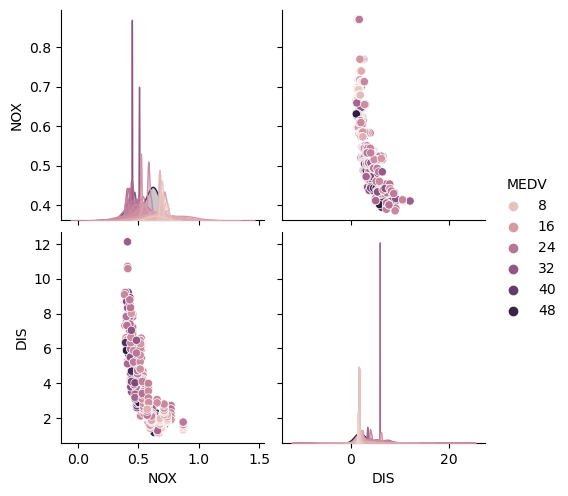

In [35]:
fig = sns.pairplot(boston,hue='MEDV', vars=['NOX', 'DIS'])

Î™®Îç∏ ÌïôÏäµÌïòÍ≥† ÌèâÍ∞ÄÌïòÍ∏∞

In [33]:
X = boston.drop(labels='MEDV', axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

from sklearn.linear_model import LinearRegression

lr_skl = LinearRegression()
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)


X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
model_trained = model.fit()


print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing R2: {:.3f}'.format(test_r2_skl))

print(model_trained.summary())

Testing MSE: 25.265
Testing MAE: 3.667
Testing R2: 0.698
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     109.5
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          3.64e-112
Time:                        23:39:49   Log-Likelihood:                -1185.9
No. Observations:                 404   AIC:                             2396.
Df Residuals:                     392   BIC:                             2444.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÌï¥Î≥¥Í∏∞

Ïù¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÄ test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ 69.8ÌçºÏÑºÌä∏ Ï†ïÎèÑÏùò ÏÑ§Î™ÖÎ†•ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§! <br>
ÏÉùÍ∞ÅÎ≥¥Îã§ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÎèÑ Í≥ÑÏÜç ÎÜíÍ≥† AIC, BIC ÏßÄÏàòÎèÑ ÎÜíÏùÄ Í≤É Í∞ôÏïÑÏÑú ÏïÑÏâΩÎã§... <br>
Ï≤òÏùåÏóêÎäî Í∑∏ÎÉ• Ïã§Ïäµ ÏΩîÎìúÏ≤òÎüº dropÎßå ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§ÏóàÏóàÎäîÎç∞ ÏÉùÍ∞ÅÎ≥¥Îã§ R-squaredÍ∞Ä ÎÇÆÏïÑÏÑú ÏÉàÎ°≠Í≤å pcaÎ•º ÎèÑÏ†ÑÌï¥Î¥§Îã§. <br>
pÍ∞í ÎÜíÏùÄ Í±∞ dropÏùÑ Ï∂îÍ∞ÄÎ°ú ÌïòÎ©¥ Îçî Í¥úÏ∞ÆÏùÄ Î™®Îç∏Ïù¥ Îê† Í≤É Í∞ôÍ∏¥ ÌïúÎç∞... ÏãúÍ∞ÑÏù¥ Î∂ÄÏ°±Ìï¥ÏÑú Ï†úÏ∂úÌïòÍ≥† ÎÇòÏÑú Ìï¥Î¥êÏïºÍ≤†Îã§ üò≠üò≠